# 4. Advanced Imputation Techniques

Finally, go beyond simple imputation techniques and make the most of your dataset by using advanced imputation techniques that rely on machine learning models, to be able to accurately impute and evaluate your missing data. You will be using methods such as KNN and MICE in order to get the most out of your missing data!

<font size="5"><b>KNN imputation</b></font><br/>

Datasets always have features which are correlated. Hence, it becomes important to consider them as a factor for imputing missing values. Machine learning models use features in the DataFrame to find correlations and patterns and predict a selected feature.

One of the simplest and most efficient models is the K Nearest Neighbors. It finds 'K' points most similar to the existing data points to impute missing values.

In this exercise, the <mark>diabetes</mark> DataFrame has already been loaded for you. Use the <mark>fancyimpute</mark> package to impute the missing values in the <mark>diabetes</mark> DataFrame.

<b>Instructions</b>
- Import KNN from fancyimpute.
- Copy diabetes to diabetes_knn_imputed.
- Create a KNN() object and assign it to knn_imputer.
- Impute the diabetes_knn_imputed DataFrame

In [1]:
import pandas as pd
diabetes = pd.read_csv('pima-indians-diabetes data.csv')

In [2]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_knn_imputed = diabetes.copy(deep=True)

# Initialize KNN
knn_imputer = KNN()

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

Using TensorFlow backend.


Imputing row 1/768 with 1 missing, elapsed time: 0.364
Imputing row 101/768 with 2 missing, elapsed time: 0.379
Imputing row 201/768 with 1 missing, elapsed time: 0.387
Imputing row 301/768 with 3 missing, elapsed time: 0.395
Imputing row 401/768 with 2 missing, elapsed time: 0.399
Imputing row 501/768 with 0 missing, elapsed time: 0.399
Imputing row 601/768 with 1 missing, elapsed time: 0.414
Imputing row 701/768 with 0 missing, elapsed time: 0.414


<b>Congratulations! Now you know how to impute missing values using KNN!</b>

<font size="5"><b>MICE imputation</b></font><br/>

The fancyimpute package offers various robust machine learning models for imputing missing values. You can explore the complete list of imputers from the detailed [documentation](https://github.com/iskandr/fancyimpute). Here, we will use <mark>IterativeImputer</mark> or popularly called MICE for imputing missing values.

The <mark>IterativeImputer</mark> performs multiple regressions on random samples of the data and aggregates for imputing the missing values. You will use the <mark>diabetes</mark> DataFrame for performing this imputation.

<b>Instructions</b>

- Import IterativeImputer from fancyimpute.
- Copy diabetes to diabetes_mice_imputed.
- Create an IterativeImputer() object and assign it to mice_imputer.
- Impute the diabetes DataFrame.

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes data.csv')

In [4]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes)

<b>Congratulations! You've learned the advanced techniques to impute missing values. At the end of this chapter, you'll learn to evaluate the accuracy of these imputation techniques!</b>

<font size="5"><b>Ordinal encoding of a categorical column</b></font><br/>

Imputing categorical values involves a few additional steps over imputing numerical values. You need to first convert them to numerical values as statistical operations cannot be performed on strings.

You will use the user profile dataset which contains customer preferences and choices recorded by a restaurant. It contains only categorical features. In this exercise, you will convert the categorical column <mark>'ambience'</mark> to a numerical one using <mark>OrdinalEncoder</mark> from <mark>sklearn</mark>. The DataFrame has been loaded for you as <mark>users</mark>. The function <mark>OrdinalEncoder()</mark> has also been loaded.

<b>Instruction</b>

- Create the ordinal encoder object and assign it to ambience_ord_enc.
- Select the non-missing values of the 'ambience' column in users.
- Reshape ambience_not_null to shape (-1, 1).
- Replace the non-missing values of ambience with its encoded values.


In [5]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
users = pd.read_csv('userprofile.csv')

In [6]:
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1,1)

# Ordinally encode reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Assign back encoded values to non-null values of ambience in users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

<b>Ace! Now you know how to impute categorical values!</b>

<font size="5"><b>Ordinal encoding of a DataFrame</b></font><br/>

Categorical features can be encoded using two techniques namely, one-hot encoding and ordinal encoding. In one-hot encoding, each category becomes a column and the respective category column for each row is 1 and the others 0. In ordinal encoding, the categories are mapped to integer values starting from 0 to number of categories.

In this exercise, you will loop over all the columns in the <mark>users</mark> DataFrame to ordinally encode the categories. You will also store an encoder for each column in a dictionary <mark>ordinal_enc_dict</mark> so that the encoded columns can be converted back to the original categories.

<b>Instructions</b>

- Define an empty dictionary ordinal_enc_dict.
- Create an Ordinal Encoder object for each column.
- Select non-null values of column in users and encode them.
- Assign back the encoded values to non-null values of each column (col_name) in users.

In [7]:
users = pd.read_csv('userprofile.csv')

In [8]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column in users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

<b>Awesome! Using this for loop, you're now able to automate encoding all categorical columns in the DataFrame!</b>

<font size="5"><b>KNN imputation of categorical values</b></font><br/>

Once all the categorical columns in the DataFrame have been converted to ordinal values, the DataFrame can be imputed. Imputing using statistical models like K-Nearest Neighbors provides better imputations.

In this exercise, you'll use the <mark>KNN()</mark> function from <mark>fancyimpute</mark> to impute the missing values. Lastly, you will also convert the ordinal values back to their respective categories using the ordinal encoder's <mark>.inverse_transform()</mark> method. Remember, each column's encoder object is present in the <mark>ordinal_enc_dict</mark> dictionary. The <mark>KNN()</mark> function and the ordinally encoded DataFrame <mark>users</mark> has already been imported for you.

<b>Instructions</b>
- Initialize the KNN() imputer.
- Impute the users DataFrame and round the results.
- Iterate over columns in users and perform .inverse_tranform() on the ordinally encoded columns.

In [9]:
# Create KNN imputer
KNN_imputer = KNN()

# Impute and round the users DataFrame
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in users
for col_name in users:
    
    # Reshape the data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.013
Imputing row 101/138 with 0 missing, elapsed time: 0.016


<b>Yeah! You're now able to convert categorical values to numerical ones, impute them using machine learning, and then re-convert them to categorical ones!</b>

<font size="5"><b>Analyze the summary of linear model</b></font><br/>

Analyzing the performance of the different imputed models is one of the most significant tasks in dealing with missing data. It determines, the type of imputed DataFrame you can rely upon. For analysis, you can fit a linear regression model on the imputed DataFrame and check for various parameters that impact the selection of the imputation type.

In this exercise, you have already been loaded with the DataFrame <mark>diabetes_cc</mark> which is the complete case of diabetes DataFrame. The complete case acts as a base for comparison against other imputed DataFrames. You will use the package <mark>statsmodels.api</mark> loaded as <mark>sm</mark> for creating a linear regression model and generating summaries.

In [10]:
# diabetes_cc will act as a base for comparison against other imputed DataFrames
diabetes_cc = diabetes.dropna(how='any')

# import statsmodels
import statsmodels.api as sm

In [11]:
# Set all features in the DataFrame diabetes_cc as X by adding a constant, 
# while excluding and setting the 'Class' column as y.

# Add constant to X and set X & y values to fit linear model
X = sm.add_constant(diabetes_cc.iloc[:,:-1])
y = diabetes_cc['Class']
lm = sm.OLS(y, X).fit()

C:\Users\saqui\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
# Print the summary of the linear model lm.

# Print summary of lm
print('\nSummary: ', lm.summary())


Summary:                              OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           2.65e-31
Time:                        21:52:51   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.102

In [13]:
# Print the adjusted R-squared score of linear model lm.

# Print R squared score of lm
print('\nAdjusted R-squared score: ', lm.rsquared_adj)


Adjusted R-squared score:  0.33210805003287613


In [14]:
# Print the .params of the linear model.

# Print the params of lm
print('\nCoefficcients:\n', lm.params)


Coefficcients:
 const               -1.102677
Pregnant             0.012953
Glucose              0.006409
Diastolic_BP         0.000055
Skin_Fold            0.001678
Serum_Insulin       -0.000123
BMI                  0.009325
Diabetes_Pedigree    0.157192
Age                  0.005878
dtype: float64


<b>Great job! You have taken your initial steps in analyzing the imputations!</b>

<font size="5"><b>Comparing R-squared and coefficients</b></font><br/>

During the analysis of imputed DataFrames on a linear model, the R-squared score which explains the accuracy and the coefficients which explains the model itself can act as some of the important characteristics to check for the quality of imputation.

In this exercise, you will compare the adjusted R-squared and the coefficients of the linear regressions belonging to the mean, KNN and MICE imputed DataFrames against the baseline linear model <mark>diabetes_cc</mark> respectively. Their linear models have already been loaded for you as <mark>lm</mark>, <mark>lm_mean</mark>, <mark>lm_KNN</mark> and <mark>lm_MICE</mark> for making the comparisons.

<b>Create the r_squared DataFrame by mapping each model's adjusted R-squared to the imputation name.</b>

In [15]:
from sklearn.impute import SimpleImputer

# Make a copy of diabetes for Mean Imputation
diabetes_mean_imputed = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean_imputed.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean_imputed)

In [16]:
# Mean Imputation
X = sm.add_constant(diabetes_mean_imputed.iloc[:, :-1])
y = diabetes['Class']
lm_mean = sm.OLS(y, X).fit()

# KNN Imputation
X = sm.add_constant(diabetes_knn_imputed.iloc[:, :-1])
lm_KNN = sm.OLS(y, X).fit()

# MICE Imputation
X = sm.add_constant(diabetes_mice_imputed.iloc[:, :-1])
lm_MICE = sm.OLS(y, X).fit()

C:\Users\saqui\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
# Store the Adj. R-squared scores of the linear models
r_squared = pd.DataFrame({'Complete Case': lm.rsquared_adj, 
                          'Mean Imputation': lm_mean.rsquared_adj, 
                          'KNN Imputation': lm_KNN.rsquared_adj, 
                          'MICE Imputation': lm_MICE.rsquared_adj}, 
                         index=['Adj. R-squared'])

print(r_squared)

                Complete Case  Mean Imputation  KNN Imputation  \
Adj. R-squared       0.332108         0.313781        0.316505   

                MICE Imputation  
Adj. R-squared         0.316532  


<b>Create the coeff DataFrame by mapping each model's coefficients to the imputation name.</b>

In [18]:
# Store the coefficients of the linear models
coeff = pd.DataFrame({'Complete Case': lm.params, 
                      'Mean Imputation': lm_mean.params, 
                      'KNN Imputation': lm_KNN.params, 
                      'MICE Imputation': lm_MICE.params})

print(coeff)

                   Complete Case  Mean Imputation  KNN Imputation  \
const                  -1.102677        -1.024005       -1.027586   
Pregnant                0.012953         0.020693        0.020074   
Glucose                 0.006409         0.006467        0.006593   
Diastolic_BP            0.000055        -0.001137       -0.001191   
Skin_Fold               0.001678         0.000193        0.001744   
Serum_Insulin          -0.000123        -0.000090       -0.000129   
BMI                     0.009325         0.014376        0.013103   
Diabetes_Pedigree       0.157192         0.129282        0.127763   
Age                     0.005878         0.002092        0.002036   

                   MICE Imputation  
const                    -1.034975  
Pregnant                  0.020381  
Glucose                   0.006638  
Diastolic_BP             -0.001220  
Skin_Fold                 0.000567  
Serum_Insulin            -0.000116  
BMI                       0.014148  
Diabetes_Pedi

<b>Select the best imputation based on the R-squared score.</b>

In [19]:
r_squares = {'Mean Imputation': lm_mean.rsquared_adj, 
             'KNN Imputation': lm_KNN.rsquared_adj, 
             'MICE Imputation': lm_MICE.rsquared_adj}

# Select best R-squared
best_imputation = max(r_squares, key=r_squares.get)

print("The best imputation technique is: ", best_imputation)

The best imputation technique is:  MICE Imputation


<b>Congratulations! You have performed a numerical analysis of the linear models of different imputations. You will next perform graphical analysis of the linear models!</b>

<font size="5"><b>Comparing density plots</b></font><br/>

The different imputations that you have performed earlier can be graphically compared with their density plots to realize which dataset has the most similar distribution compared to the original dataset. You will also be able to interpret which dataset has a biased imputation.

The DataFrames <mark>diabetes_cc</mark>, <mark>diabetes_mean_imputed</mark>, <mark>diabetes_knn_imputed</mark> and <mark>diabetes_mice_imputed</mark> have already been loaded for you to use along with <mark>matplotlib.pyplot</mark> as <mark>plt</mark>.

<b>Instructions</b>

- Plot a density plot for the 'Skin_Fold' column for each DataFrame.
- Set the labels using the labels list.
- Set the label for the x-axis to 'Skin Fold'.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

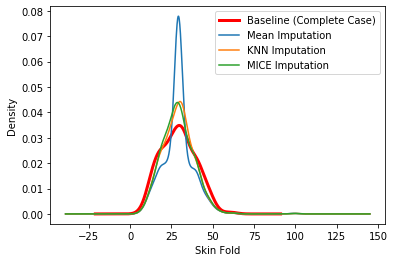

In [21]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc['Skin_Fold'].plot(kind='kde', c='red', linewidth=3)
diabetes_mean_imputed['Skin_Fold'].plot(kind='kde')
diabetes_knn_imputed['Skin_Fold'].plot(kind='kde')
diabetes_mice_imputed['Skin_Fold'].plot(kind='kde')

# Create labels for the four DataFrames
labels = ['Baseline (Complete Case)', 'Mean Imputation', 'KNN Imputation', 'MICE Imputation']
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel('Skin Fold')

plt.show()

<b>Congratuations! You have now mastered the art of dealing with missing data!</b>